<center><h2> Module 3 Project</h2></center>
<center><h2> Hypothesis Testing</h2></center>

**Authors:** Titus Bridgwood, Itua Etiobhio, Inesa Lisnic

## Context

Imagine we are the data science team for a popular sports betting website, bet366. The management have asked us to find statistical grounding for some of the most common myths surrounding the results of football matches. In this document we will be examining four of these hypotheses and seeing whether the purported relationships exist or not. We will be looking at the 2018/2019 English Premier League season. 

## The Hypotheses

1. Is a team more likely to win playing at home?
    * $H_0$: There is no relationship between the team's home and away match performance.
    * $H_1$: A team is significantly more likely to win if they play at home.
    
  
2. Is there a relationship between the age of a player and the minutes that the player plays?
    * $H_0$: There is no relationship between a player's age and the minutes that a player plays in a season.
    * $H_1$: A player is significantly more likely to play more minutes if they are older.
    

3. If there are more cards in a game, are there more goals scored?
    * $H_0$: There is no significant reltationship between the number of cards in a game and the number of goals scored. 
    * $H_1$: If there are more cards in a game, it is significantly more probable that there will be more goals.
    


4. If a foreign player more likely to score than an english player?
    * $H_0$: A foreign player is no more likely to score more goals than an english player.
    * $H_1$: A foreign player is more likely to score more goals than an english player.


#### Analysis

In [74]:
from __future__ import print_function, division # Importing the necessary libraries for our work. 
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower, TTestPower
import functions as fn
sns.set()
print(fn.__file__)


/Users/tiebridgwood/Documents/Coding/Flatiron_DSC/mod3project/functions.py


In [54]:
%load_ext autoreload
%autoreload 2

## Hypothesis 1 - The home team advantage

It is a widely held belief, and an intuitive fact that playing at home gives a team an advantage. Liverpool have recently gone undefeated at home for 46 consecutive games. However is there really a statistically significant relationship between playing at home and winning?

### Choosing a significance level

Our alpha or *α* for this hypothesis test, is set at a significance level of 0.05. This indicates a 5% risk of concluding that a difference exists when there is no actual difference. Alpha sets the standard for how extreme the data must be before we can reject the null hypothesis. Considering we are producing results for a betting site, we want to be fairly confident in rejecting the null hypothesis before we recommend any business actions on the part of Bet366. For this purpose an alpha level of 0.05 seems appropriate. If this hypothesis test results in a p-value of less than 0.05 then we will reject the null hypothesis. 

Using information pulled from APIs we have made new columns for binary values of home team wins and away team wins. 

In [32]:
hy1_df = pd.read_csv('Footytable.csv')

In [33]:
hy1_df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Total_goals,home_team_win,away_team_win
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.75,1.70,2.29,2.21,1.55,4.07,7.69,3,1,0
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,2.20,2.13,1.80,1.75,1.88,3.61,4.70,2,1,0
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,2.18,2.11,1.81,1.77,2.62,3.38,2.90,2,0,1
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,1.80,2.13,2.06,7.24,3.95,1.58,3,0,1
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,2.20,2.12,1.80,1.76,4.74,3.53,1.89,3,0,1


In [34]:
home_team_win_array = np.array(hy1_df['home_team_win'])

away_team_win_array = np.array(hy1_df['away_team_win'])

In [35]:
def sample_making(array): # Taking random 100 value samples from these arrays. 
    random_sample = np.random.choice(array,size=100)
    return random_sample

In [36]:
np.random.seed(40) # Setting a seed for randomization for replicability.
random_home_sample= sample_making(home_team_win_array)
random_away_sample = sample_making(away_team_win_array)

In [37]:
def hist_sample(sample, title): # Function for making histograms. 
    plt.hist(sample)
    plt.title(f"Number of Sample {title}")
    plt.ylabel("Number of games")

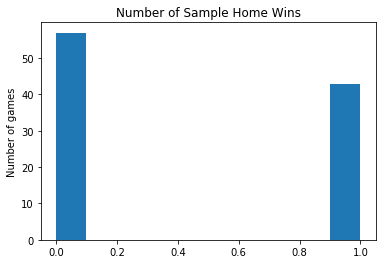

In [38]:
hist_sample(random_home_sample, 'Home Wins')

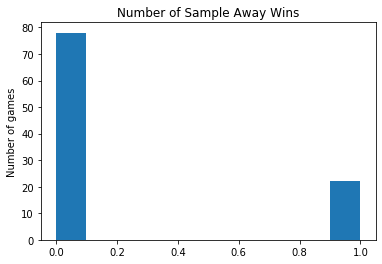

In [39]:
hist_sample(random_away_sample, 'Away Wins')

We have created two distributions with 1 representing a win and 0 representing losses and draws. We will then be comparing these distributions using a Welch's T-Test.

In [40]:
print(np.var(random_home_sample), np.var(random_away_sample))

0.24509999999999996 0.17160000000000003


### Welch's T-Test

For the analysis of statistical significance in this case we have used the Welch's T-Test. We have done so for the following reasons:

    - These are two disparate groups; we are not testing repeated performance for specific teams, but rather assessing the wins and losses for the league as a whole. 
    - The variance between the two groups is not the same. The variance for the sample of home wins and losses is 0.245 whereas the variance for the sample of away wins and losses is 0.172. A Welch's T-Test is typically preferred when variances between samples are not equal
    - The Welch's T-Test is more robust. It is more capable of dealing with skewed distributions and binary distributions, such as the one we have here. 
    
First we will calculate our T-statistic. Then we will calculate our ciritcal T-value as a threshold so that if the resultant T-statistic from our T-test is greater than this threshold we can reject our null hypothesis. 

In [59]:
tt_results = stats.ttest_ind(random_home_sample, random_away_sample, equal_var=False) # With equal variance set to false Scipy's Independent T-Test defaults to a welch's T-Test
hy1_t = tt_results.statistic
hy1_p = tt_results.pvalue
hy1_t

3.2368691376474987

So our t-statistic is 3.236, but without a critical T-value this doesn't mean very much. Now we have to calculate our critical T-value, and in order to do so we must first calculate the degrees of freedom for our samples. Calculating the degrees of freedom for a Welch's T-test we have to use the Welch-Satterthwaite equation in order to account for the unequal variances; we have made a function for this. 

In [42]:
from hypothesis_tests import welch_dof

In [46]:
hy1_dof = welch_dof(random_home_sample, random_away_sample) # Getting our W-S Degrees of freedom
hy1_dof

192.02569990338532

In [50]:
hy1_t_crit = np.round(stats.t.ppf(1-0.05, df=hy1_dof), 3) # Using our degrees of freedom to calculate our critical T-value
hy1_t_crit

1.653

We can already see that our T-statistic has crossed the critical threshold, but a visualisation will make this clearer. As we will be relying on the T-test as our primary hypothesis test across our hypotheses, we have made a function for this visualistation. 

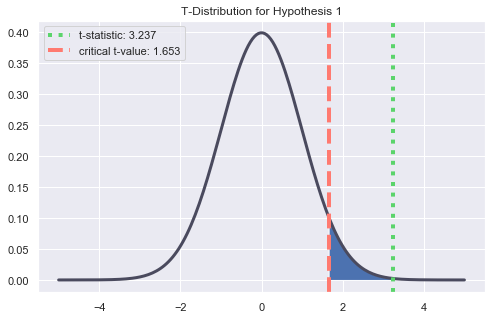

<Figure size 432x288 with 0 Axes>

In [58]:
from hypothesis_tests import make_t_dist
make_t_dist(hy1_t, hy1_t_crit, hy1_dof, 'T-Distribution for Hypothesis 1')

The green line on the figure above represents the T-statistic from our Welch's T-Test, and the red line represents our threshold. We have clearly crossed our threshold by quite some margin so we can comfortably reject our null hypothesis and say that there is a statistically significant difference between the number of home wins and the number of away wins in the premier league. 

However in order to qualify our rejection we must also look at the p-value, power and effect size for this statistical test. 

### Other considerations: Cohen's D and Power

We calculated our p-value earlier with our T-test, however we will still need to calculate our power and our effect size, which we will do with a calculaion of Cohen's D, a way of measurin the distance between the means while acounting for uneual variance between samples.

In [69]:
from hypothesis_tests import cohen_d

In [73]:
hy1_cohen_d = cohen_d(random_home_sample, random_away_sample) # Calculating Cohen's D
hy1_cohen_d

0.4600685459305424

In [76]:
power_analysis = TTestIndPower() #Using Cohen's D to calculate the power of our analysis.
hy1_power = power_analysis.solve_power(effect_size=.46, nobs1=100, alpha=.05)

### Conclusions and Limitations

From conducting a welch t-test, the calculated p value is 0.0007, effect size (cohen’s d) = 0.46 and power = 89.9%. As the p value is lower than the alpha (0.05) we can reject the null hypothesis. However calculating an incredibly low p-value does not guarantee that the null-hypothesis is incorrect. Therefore we calculated cohen’s d (0.46). Using the general “rule of thumb” guidelines this means there is a medium effect. The statistical power is ~90%. This high power suggest a high probability of rejecting the null hypothesis, given that it is indeed false. 

In conclusion, we can reject the null hypothesis as our p value is smaller than alpha, there is a high statistical power and a medium effect size. We can therefor give actionable insight to our management at Bet366 that there is a considerable advantege to playing at home. 

There are however some limitation to our findings. Our analysis is not a regression analysis so we cannot say with any certainty just how much of a difference playing at home makes. Furthermore our sample sizes are not overly large so we could in theory obtain more data for a more thorough analysis.

## Hypothesis 2 - Older players, more minutes?

In [2]:
# importing dataframe with age and minutes per match columns
age_min=pd.read_csv('football_players_age_and_minutes.csv')
age_min.head()

,age,min_per_match
0,28,90
1,29,74
2,25,87
3,24,89
4,25,53


In [3]:
# computing the players age mean
age_mean=round(age_min['age'].mean(),0)

In [4]:
# creating a new column with the categorized values 0 and 1 which means young and old respectively
age_min['age_category']=age_min['age'].apply(lambda x: 1 if x >= age_mean else 0 )
age_min.head()

,age,min_per_match,age_category
0,28,90,1
1,29,74,1
2,25,87,0
3,24,89,0
4,25,53,0


In [5]:
# counting the young and old players, which signify the populations of young and old players
old=age_min.loc[age_min['age_category']==1]
young=age_min.loc[age_min['age_category']==0]
print(len(old), len(young))

284 216


In [6]:
# sampling an equal size of samples from both the young and old populations
sample_old_min=fn.sampling_selecting(old, 100, 'min_per_match')
sample_young_min=fn.sampling_selecting(young, 100, 'min_per_match')

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'The frequency of played minutes by old and young players')

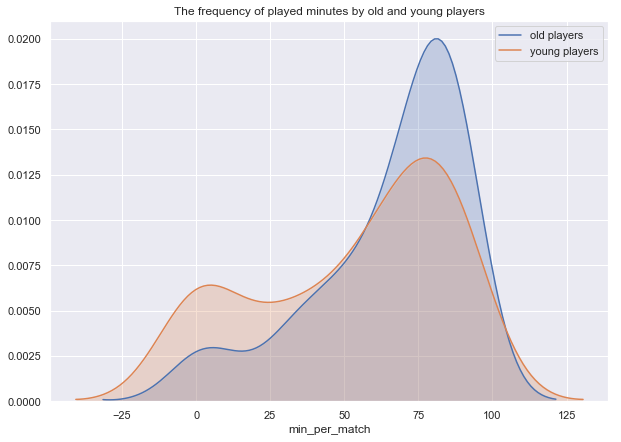

In [48]:
# ploting the graphs of samples distributions
sns.distplot(sample_old_min, hist=False, kde_kws={"shade": True}, label='old players')
sns.distplot(sample_young_min, hist=False, kde_kws={"shade": True}, label='young players')
plt.legend()
plt.title('The frequency of played minutes by old and young players')

Above we have the distributions for young and old players based on minutes played per match.
We assume that the sample mean of older players is bigger than the sample mean for younger players.
Considering the same variancy and size of the samples, we will use the Two samples T-test in order to verify the probability of random occurence in these samples. 

In [57]:
tt_results1=stats.ttest_ind(sample_old_min, sample_young_min)
tt_results1

Ttest_indResult(statistic=2.979059013158594, pvalue=0.003272078540836404)

In [58]:
t1 = tt_results1.statistic
t1

2.979059013158594

In [59]:
df1=fn.welch_dof(sample_young_min,sample_old_min)
df1

188.3788044402658

In [11]:
t_critical1=1.653

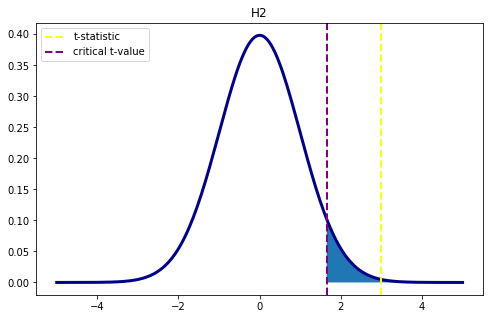

In [12]:
fn.make_t_dist(t1, t_critical1, df1, 'H2')

In [14]:
fn.Cohen_d(sample_old_min, sample_young_min)

0.42130256595186927

In [18]:
national_performance=pd.read_csv('football_players_by_nationality_and_goals.csv')
national_performance.head()

,nationality,goals_overall,position
0,Spain,0,Goalkeeper
1,Italy,0,Defender
2,Sweden,1,Defender
3,England,1,Defender
4,Côte d'Ivoire,0,Defender


In [19]:
national=national_performance.loc[national_performance['nationality']=='England']
national_pos=national.loc[(national['position']=='Midfielder')|(national['position']=='Forward')]
foreign=national_performance.loc[national_performance['nationality']!='England']
foreign_pos=foreign.loc[(foreign['position']=='Midfielder')|(foreign['position']=='Forward')]

In [20]:
print(len(national_pos), len(foreign_pos))

90 186


In [25]:
sample_nat_goals=fn.sampling_selecting(national_pos, 60, 'goals_overall')
sample_for_goals=fn.sampling_selecting(foreign_pos, 60, 'goals_overall')

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'The frequency of goals from english and foreign players')

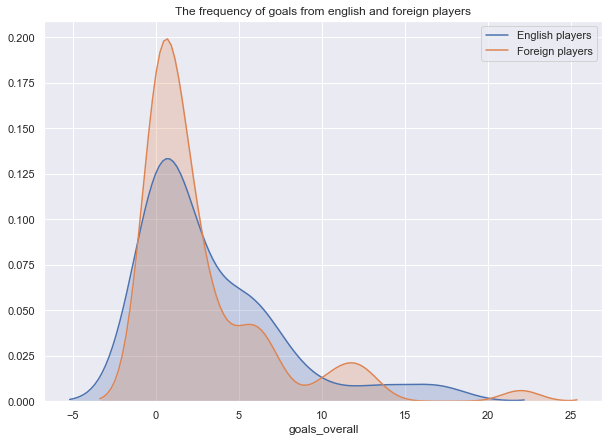

In [49]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(sample_nat_goals, hist=False, kde_kws={"shade": True}, label='English players')
sns.distplot(sample_for_goals, hist=False, kde_kws={"shade": True}, label='Foreign players') 
plt.legend()
plt.title('The frequency of goals from english and foreign players')

In [27]:
tt_results = stats.ttest_ind(sample_nat_goals, sample_for_goals, equal_var=False)

In [28]:
t = tt_results.statistic

In [30]:
df = fn.welch_dof(sample_nat_goals,sample_for_goals)

In [31]:
t_critical = 1.658

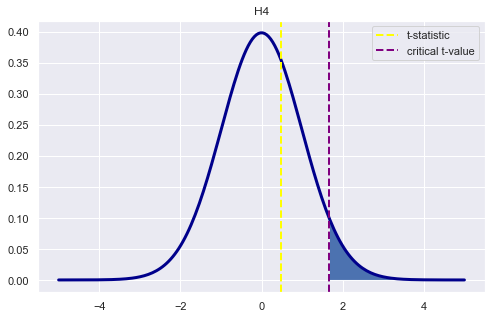

In [32]:
fn.make_t_dist(t, t_critical, df, 'H4')

In [34]:
fn.Cohen_d(sample_for_goals, sample_nat_goals)

-0.08705906270078691

#### Findings & Application

#### Limitations

#### Next Steps